# Project : Investigate a Dataset of TMDB Movies

## Table of contents
<ul>
<li><a href="#intro"> Introduction </a></li>
<li><a href="#wrangling"> Data Wrangling </a></li>
<li><a href="#explore"> Exploratory Data Analysis </a></li>
<li><a href="#conclusion"> Conclusions to Questions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> 1. Importing Data
> 2. Checking & Thinking of possible questions to answer
> 3. Selecting Dependent and Independent variables for analysis

In [172]:
# All import for Projects
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [173]:
# Importing Data and doing basic analysis
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [174]:
df.shape

(10866, 21)

In [175]:
df.vote_average.value_counts()

6.1    496
6.0    495
5.8    486
5.9    473
6.2    464
      ... 
8.6      1
8.9      1
9.2      1
2.0      1
8.7      1
Name: vote_average, Length: 72, dtype: int64

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Choosing Dependent and independent variables
> Voting Average looks like a link between fields. It will be interesting to do analysis of how voting average is correlated and impacting Budget, Revenue, popularity, director


### Questions to explore
> 1. Is voting average high is budget spend is higher? Any correlation there?
> 2. Is higher revenue has any correlation with voting average?
> 3. Is popularity has any association with voting average?
> 4. Has director name has any impact on voting average?
Assumption Budget & revenue adjusted will be final correct values

<a id='wrangling'></a>
# Data Wrangling
> Removing all extra columns from dataframe
> Checking datatypes
> Checking for duplicates
> Checking for null values
> Dropping or filling Null values

In [177]:
all_columns = df.columns
all_columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [178]:
df.drop(columns=['imdb_id', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'release_year', ], axis=1, inplace=True)
df.head()

,id,popularity,director,vote_average,budget_adj,revenue_adj
0,135397,32.985763,Colin Trevorrow,6.5,1.379999e+08,1.392446e+09
1,76341,28.419936,George Miller,7.1,1.379999e+08,3.481613e+08
2,262500,13.112507,Robert Schwentke,6.3,1.012000e+08,2.716190e+08
3,140607,11.173104,J.J. Abrams,7.5,1.839999e+08,1.902723e+09
4,168259,9.335014,James Wan,7.3,1.747999e+08,1.385749e+09


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10866 non-null  int64  
 1   popularity    10866 non-null  float64
 2   director      10822 non-null  object 
 3   vote_average  10866 non-null  float64
 4   budget_adj    10866 non-null  float64
 5   revenue_adj   10866 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 509.5+ KB


In [180]:
# There are director values which are missing, As we cannot fill it with other or any other mean values.
df.dropna(subset=['director'], inplace=True)

In [181]:
# Creating ratings columns which mark rating as Very good (8+), good ( 7-8), Average( 6-7) , poor( 4-6), very poor( 4-)

In [182]:
def rating(row):
       if row['vote_average'] >= 8:
              val = 'very good'
       elif 7 <= row['vote_average'] < 8:
              val = 'good'
       elif 6 <= row['vote_average'] <7:
              val = 'average'
       elif 4 <= row['vote_average'] <6:
              val = 'poor'
       else:
              val = 'very poor'
       return val

df['ratings'] = df.apply(rating, axis =1 )


In [183]:
# Confirming Drop
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10822 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10822 non-null  int64  
 1   popularity    10822 non-null  float64
 2   director      10822 non-null  object 
 3   vote_average  10822 non-null  float64
 4   budget_adj    10822 non-null  float64
 5   revenue_adj   10822 non-null  float64
 6   ratings       10822 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 676.4+ KB


In [184]:
df.describe()

,id,popularity,vote_average,budget_adj,revenue_adj
count,10822.000000,10822.000000,10822.000000,1.082200e+04,1.082200e+04
mean,65719.968952,0.648525,5.971419,1.762126e+07,5.157217e+07
std,91837.722286,1.001657,0.933675,3.435805e+07,1.448894e+08
min,5.000000,0.000188,1.500000,0.000000e+00,0.000000e+00
25%,10578.250000,0.209038,5.400000,0.000000e+00,0.000000e+00
50%,20534.500000,0.385161,6.000000,0.000000e+00,0.000000e+00
75%,74997.750000,0.716278,6.600000,2.099042e+07,3.397891e+07
max,417859.000000,32.985763,9.200000,4.250000e+08,2.827124e+09


In [185]:
max_pop = df['popularity'].max()
df.query('popularity == {}'.format(max_pop))

,id,popularity,director,vote_average,budget_adj,revenue_adj,ratings
0,135397,32.985763,Colin Trevorrow,6.5,1.379999e+08,1.392446e+09,average


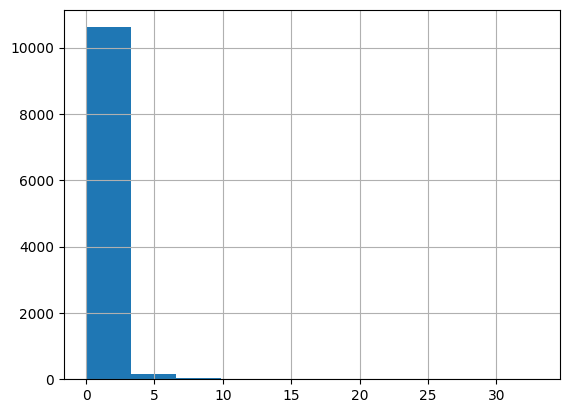

In [186]:
df['popularity'].hist();

In [187]:
# Graph clearly shows that any values above 10 are outlier in popularity and will skew the decision making, we should drop lines which are more than 10
df = df.query('popularity <= 10')

## Exploratory Data Analysis
Here we will explore data analysis and create a interpretation for each of question we asked in introduction

### Question 1: Is voting average high is budget spend is higher? Any correlation there?

In [188]:
voting_budget_corr = df['vote_average'].corr(df['budget_adj'])
voting_budget_corr

0.09147319285284637

In [189]:
# Normalize it to Millions
ratings_budget = df.groupby('ratings').budget_adj.mean() / 1000000

In [190]:
ratings_budget

ratings
average      20.158797
good         19.477732
poor         15.370837
very good    11.627380
very poor     5.110997
Name: budget_adj, dtype: float64

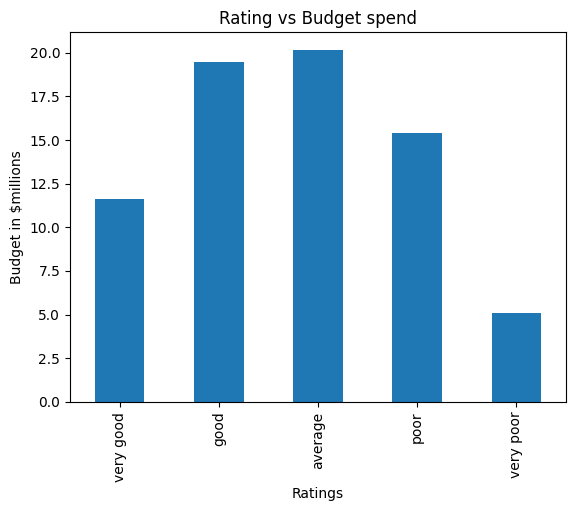

In [191]:
ratings_budget.loc[['very good','good','average','poor','very poor']].plot.bar();
plt.title('Rating vs Budget spend')
plt.xlabel('Ratings')
plt.ylabel('Budget in $millions');

#### Conclusion Question 1
1. High Rating has not direct correlation with Budget of Movie, we might have expected more money spend will lead to higher rating as quality and cast is good. Actually is not associated
2. Average moves tends to have highest budget
3. Very poor is nicely correlated to fact that less spend leads to poor quality of movies leads to poor ratings
4. Poor correlation confirm our point 1

### Question 2: Does higher revenue has any correlation with voting average?

In [192]:
voting_revenue_corr = df['vote_average'].corr(df['revenue_adj'])
voting_revenue_corr

0.19234311579926078

In [193]:
rating_revenue_distribution = df.groupby('ratings').revenue_adj.mean() /1000000

In [194]:
rating_revenue_distribution

ratings
average       61.549322
good         100.064794
poor          27.906549
very good     99.119857
very poor      3.164906
Name: revenue_adj, dtype: float64

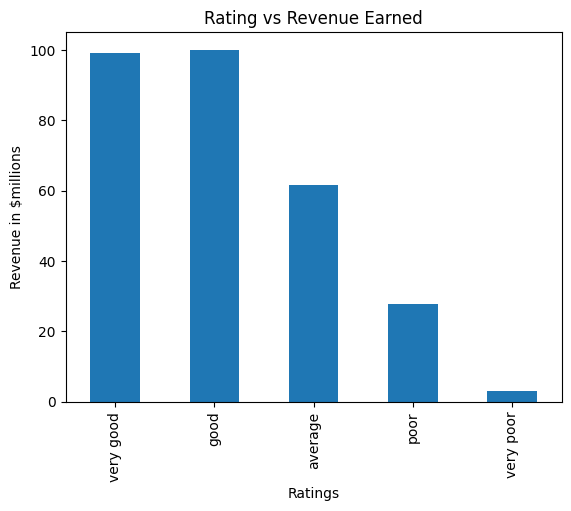

In [195]:

rating_revenue_distribution.loc[['very good','good','average','poor','very poor']].plot.bar();
plt.title('Rating vs Revenue Earned')
plt.xlabel('Ratings')
plt.ylabel('Revenue in $millions');

### Conclusion Question 2
1. Yes high revenues has direct correlation with ratings, it is weak , not very strong
2. Good and very good movies in general earn same revenue which shows any rating above 7 earns good revenue

## Question 3 : Is popularity has any association with voting average?

In [196]:
popul_revenue_corr = df['vote_average'].corr(df['popularity'])
popul_revenue_corr

0.23174001546431133

In [197]:
popularity_revenue_distribution = df.groupby('ratings').popularity.mean()
popularity_revenue_distribution

ratings
average      0.673628
good         1.006268
poor         0.488672
very good    1.328539
very poor    0.304664
Name: popularity, dtype: float64

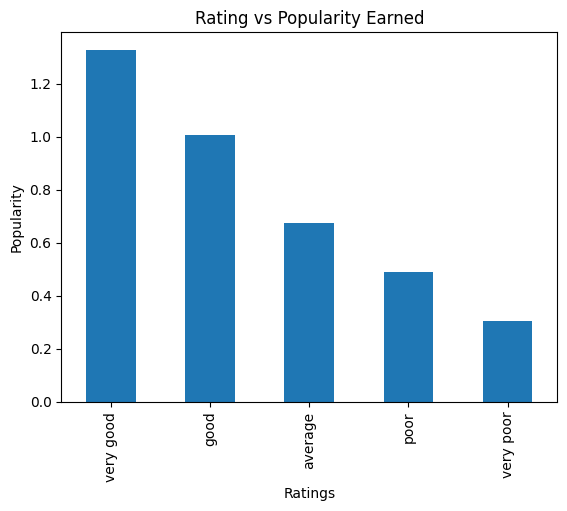

In [198]:
popularity_revenue_distribution.loc[['very good','good','average','poor','very poor']].plot.bar();
plt.title('Rating vs Popularity Earned')
plt.xlabel('Ratings')
plt.ylabel('Popularity');

### Conclusion Question 3:
> rating has strong correlation with popularity

## Question 4 : Has director name has any impact on voting average?

In [199]:
director_voting = df.groupby('director').mean().vote_average
director_voting

/var/folders/21/qywv5crs2nd9_kc0fd39_y_h0000gn/T/ipykernel_14914/4163633601.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  director_voting = df.groupby('director').mean().vote_average


director
 FrÃ©dÃ©ric Jardin            5.9
A. Todd Smith                 5.4
A.R. Murugadoss               6.9
Aaron Aites                   6.5
Aaron Blaise|Robert Walker    6.8
                             ... 
Ã‡aÄŸan Irmak                 8.2
Ã‰mile Gaudreault             5.2
Ã‰ric Besnard                 5.1
Ã‰tienne Chatiliez            6.7
Ã€lex Pastor|David Pastor     5.7
Name: vote_average, Length: 5065, dtype: float64

In [200]:
director_value_count = df.director.value_counts()
director_value_count

Woody Allen                    45
Clint Eastwood                 34
Martin Scorsese                29
Steven Spielberg               29
Ridley Scott                   23
                               ..
Dan Povenmire|Robert Hughes     1
Sam Levinson                    1
Daniel Auteuil                  1
Chris Kentis|Laura Lau          1
Harold P. Warren                1
Name: director, Length: 5065, dtype: int64

In [201]:
df['no_of_movies'] = df.groupby(['director'])['id'].transform('count')
df.head()

,id,popularity,director,vote_average,budget_adj,revenue_adj,ratings,no_of_movies
4,168259,9.335014,James Wan,7.3,1.747999e+08,1.385749e+09,good,8
5,281957,9.110700,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,7.2,1.241999e+08,4.903142e+08,good,4
6,87101,8.654359,Alan Taylor,5.8,1.425999e+08,4.053551e+08,poor,2
7,286217,7.667400,Ridley Scott,7.6,9.935996e+07,5.477497e+08,good,23
8,211672,7.404165,Kyle Balda|Pierre Coffin,6.5,6.807997e+07,1.064192e+09,average,1


In [202]:
# Let's analyze if director do more movies it leads to better rating. So dropping all movies below 1

df_director = df.query('no_of_movies > 1')
df_director.shape

(7595, 8)

In [203]:
vote_avg_movies = df.groupby('no_of_movies').vote_average.mean()

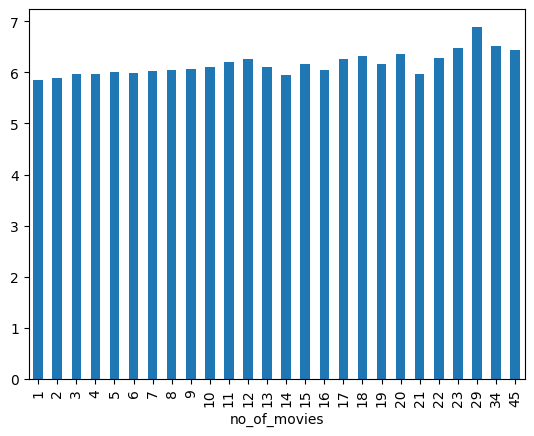

In [204]:
vote_avg_movies.plot.bar();

Conclusion Question 4
> Poor correlation with director to ratings
> Poor correlation with number of movies to vote average, there is slight increase and better as you do more movies you tend to get better in getting good customer ratings, but not significant


## Conclusions Mentioned post every Question
> thank you !